/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.0062 - val_loss: 0.0029
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━

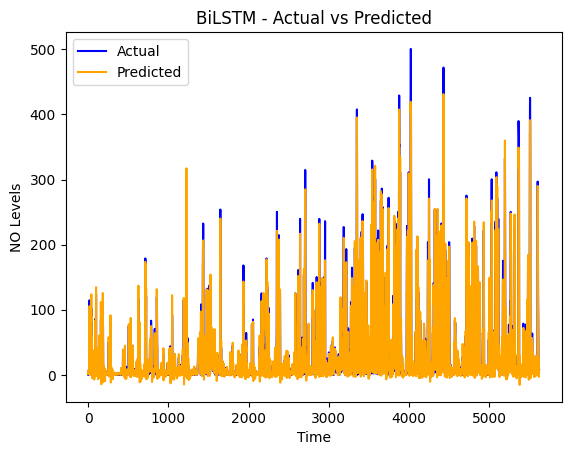

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['no']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
no_mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
no_mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
no_rmse_bilstm = np.sqrt(no_mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {no_mae_bilstm:.4f}")
print(f"MSE: {no_mse_bilstm:.4f}")
print(f"RMSE: {no_rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('NO Levels')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0013 - val_loss: 9.3735e-04
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0013 - val_loss: 9.0405e-04
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0013 - val_loss: 8.5662e-04
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.0012 - val_loss: 8.2742e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0011 - val_loss: 9.2009e-04
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0011 - val_loss: 8.6573e-04
Epoch 12/50
411/411 ━━━

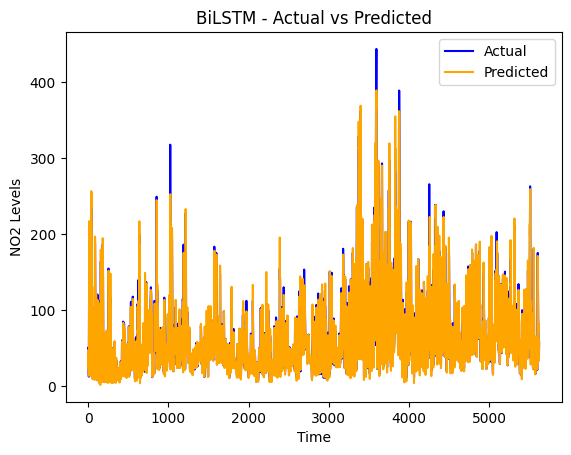

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['no2']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
no2_mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
no2_mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
no2_rmse_bilstm = np.sqrt(no2_mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {no2_mae_bilstm:.4f}")
print(f"MSE: {no2_mse_bilstm:.4f}")
print(f"RMSE: {no2_rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('NO2 Levels')
plt.legend()
plt.show()

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0037 - val_loss: 0.0010
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0012 - val_loss: 6.4106e-04
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 9.5054e-04 - val_loss: 5.8404e-04
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 9.0665e-04 - val_loss: 6.9781e-04
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 8.5934e-04 - val_loss: 5.0278e-04
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 8.5349e-04 - val_loss: 4.7968e-04
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 8.3515e-04 - val_loss: 5.1171e-04
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 7.3683e-04 - val_loss: 4.5566e-04
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 7.9560e-04 - val_loss: 4.4699e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 6.9980e-04 - val_loss: 4.9872e-04
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 8.548

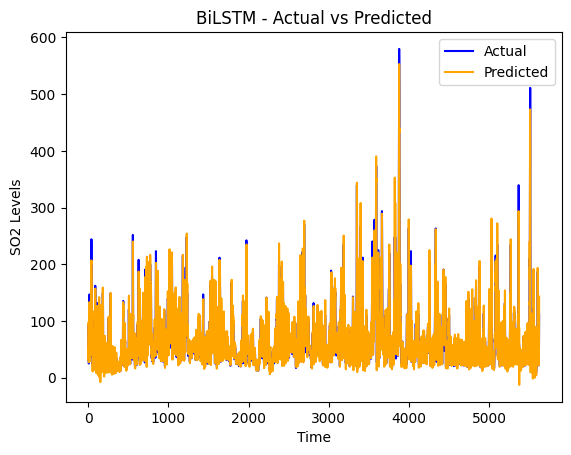

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['so2']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
so2_mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
so2_mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
so2_rmse_bilstm = np.sqrt(so2_mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {so2_mae_bilstm:.4f}")
print(f"MSE: {so2_mse_bilstm:.4f}")
print(f"RMSE: {so2_rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('SO2 Levels')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0039 - val_loss: 0.0011
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0013 - val_loss: 6.9434e-04
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0010 - val_loss: 5.5438e-04
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 8.7368e-04 - val_loss: 4.6189e-04
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 8.3064e-04 - val_loss: 5.9048e-04
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 7.8923e-04 - val_loss: 4.5819e-04
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 7.7395e-04 - val_loss: 4.2844e-04
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 7.0085e-04 - val_loss: 4.4256e-04
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 7.1050e-04 - val_loss: 4.4737e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 6.6045e-04 - val_loss: 4.1573e-04
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 6.8989e-04

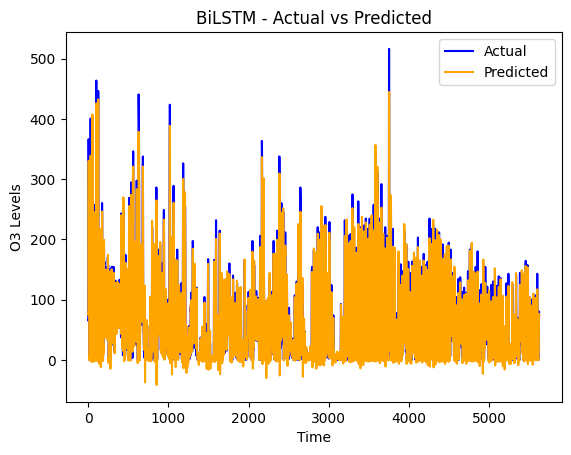

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['o3']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
o3_mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
o3_mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
o3_rmse_bilstm = np.sqrt(o3_mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {o3_mae_bilstm:.4f}")
print(f"MSE: {o3_mse_bilstm:.4f}")
print(f"RMSE: {o3_rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('O3 Levels')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0046 - val_loss: 0.0013
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0011 - val_loss: 8.6077e-04
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 9.6193e-04 - val_loss: 6.9875e-04
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 9.0001e-04 - val_loss: 6.8388e-04
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 8.8632e-04 - val_loss: 8.6645e-04
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 7.7191e-04 - val_loss: 5.8951e-04
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 7.2040e-04 - val_loss: 5.3487e-04
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 7.0192e-04 - val_loss: 4.9600e-04
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 6.5492e-04 - val_loss: 5.4213e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 6.4658e-04 - val_loss: 5.0429e-04
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 6.3158e

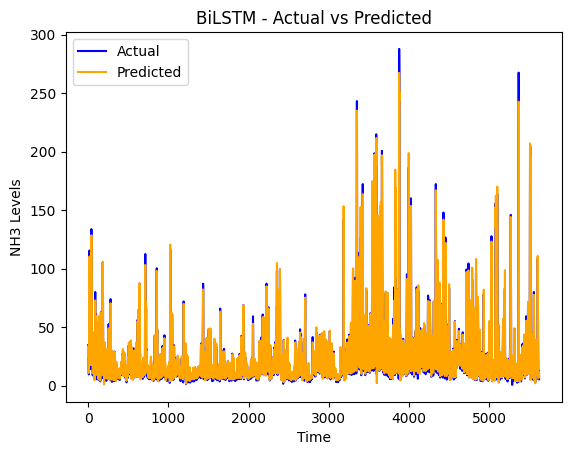

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['nh3']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
nh3_mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
nh3_mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
nh3_rmse_bilstm = np.sqrt(nh3_mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {nh3_mae_bilstm:.4f}")
print(f"MSE: {nh3_mse_bilstm:.4f}")
print(f"RMSE: {nh3_rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('NH3 Levels')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.0081 - val_loss: 0.0017
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms

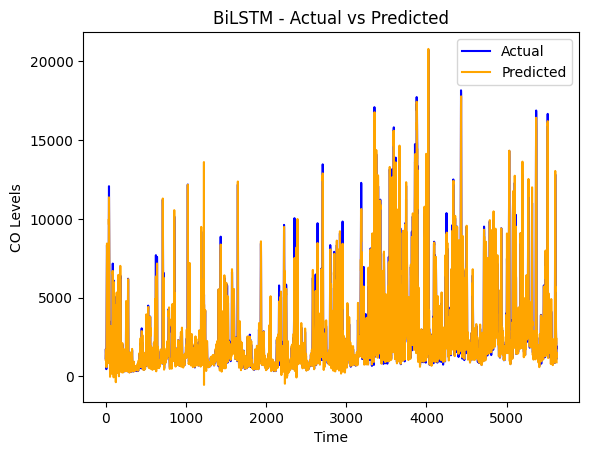

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['co']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
co_mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
co_mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
co_rmse_bilstm = np.sqrt(co_mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {co_mae_bilstm:.4f}")
print(f"MSE: {co_mse_bilstm:.4f}")
print(f"RMSE: {co_rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('CO Levels')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0060 - val_loss: 0.0013
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0015 - val_loss: 9.6190e-04
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0014 - val_loss: 9.4483e-04
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0014 - val_loss: 8.5682e-04
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0014 - val_loss: 9.3990e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0013 - val_loss: 8.5392e-04
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0012 - val_loss: 7.6279e-04
Epoch 12/50
411/411 ━━━━

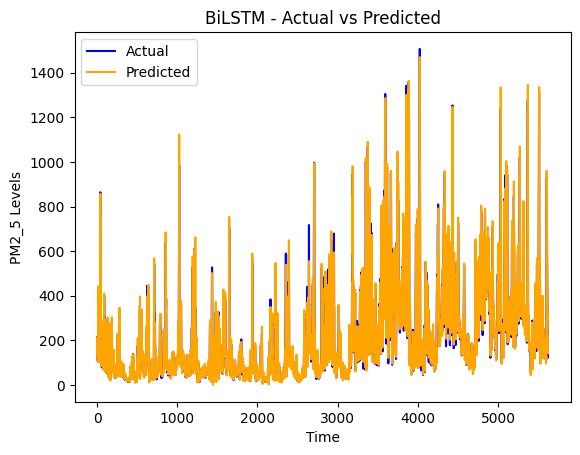

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['pm2_5']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
pm2_mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
pm2_mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
pm2_rmse_bilstm = np.sqrt(pm2_mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {pm2_mae_bilstm:.4f}")
print(f"MSE: {pm2_mse_bilstm:.4f}")
print(f"RMSE: {pm2_rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('PM2_5 Levels')
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0071 - val_loss: 0.0017
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 9/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0014 - val_loss: 9.8514e-04
Epoch 10/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 11/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 12/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5

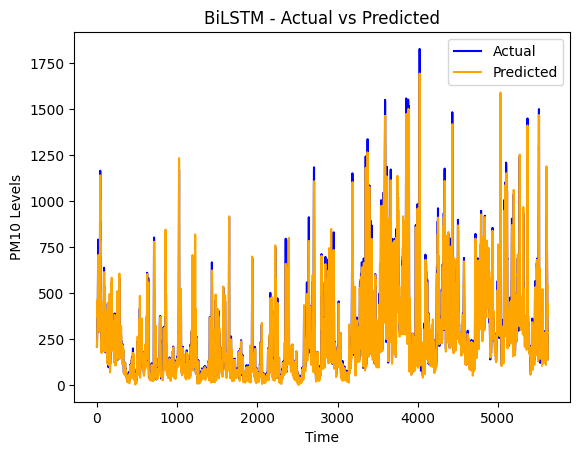

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv('delhi_aqi.csv')  # Replace with your actual dataset path
features = ['pm10']  # Only selecting 'no' column for prediction
target = features

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparing the data for the model
sequence_length = 30  # Use the last 30 hours as input
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i - sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Convert to TensorFlow tensors
X_train = tf.convert_to_tensor(X[:int(0.7 * len(X))], dtype=tf.float32)
y_train = tf.convert_to_tensor(y[:int(0.7 * len(y))], dtype=tf.float32)
X_test = tf.convert_to_tensor(X[int(0.7 * len(X)):], dtype=tf.float32)
y_test = tf.convert_to_tensor(y[int(0.7 * len(y)):], dtype=tf.float32)

# Build BiLSTM model
model_bilstm = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_bilstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_bilstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
predictions_bilstm = model_bilstm.predict(X_test)

# Convert predictions and actual values back to the original scale
predictions_bilstm = scaler.inverse_transform(predictions_bilstm)
y_test_original = scaler.inverse_transform(y_test)

# Performance Metrics
pm1_mae_bilstm = mean_absolute_error(y_test_original, predictions_bilstm)
pm1_mse_bilstm = mean_squared_error(y_test_original, predictions_bilstm)
pm1_rmse_bilstm = np.sqrt(pm1_mse_bilstm)

print(f"BiLSTM Performance Metrics:")
print(f"MAE: {pm1_mae_bilstm:.4f}")
print(f"MSE: {pm1_mse_bilstm:.4f}")
print(f"RMSE: {pm1_rmse_bilstm:.4f}")

# Plot predictions vs actual values
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predictions_bilstm, label='Predicted', color='orange')
plt.title('BiLSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('PM10 Levels')
plt.legend()
plt.show()


In [11]:
average_mae = (no_mae_bilstm + o3_mae_bilstm + so2_mae_bilstm + nh3_mae_bilstm + co_mae_bilstm + pm2_mae_bilstm + pm1_mae_bilstm)/8
print(average_mae)

37.150872253933734
